# Linear Regression, Normal Equation

## Import Libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [22]:
np.random.rand(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1) #column vector

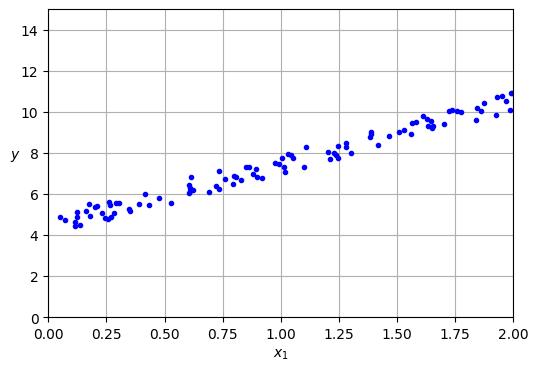

In [42]:
plt.figure(figsize = (6,4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation = 0)
plt.axis([0, 2, 0, 15])
plt.grid();

In [26]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [27]:
theta_best

array([[4.38537687],
       [3.09790598]])

In [29]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[ 4.38537687],
       [10.58118883]])

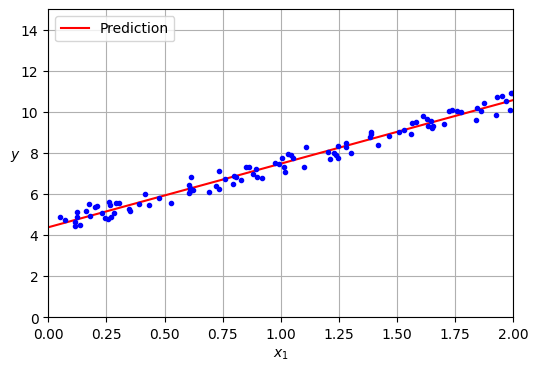

In [30]:
plt.figure(figsize = (6,4))
plt.plot(X_new, y_predict, "r-", label = "Prediction")
plt.plot(X, y, "b.")

# extra code- beatuifies 
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc = "upper left");

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.38537687]), array([[3.09790598]]))

In [36]:
lin_reg.predict(X_new)

array([[ 4.38537687],
       [10.58118883]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [39]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.38537687],
       [3.09790598]])

In [40]:
np.linalg.pinv(X_b)@y

array([[4.38537687],
       [3.09790598]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [43]:
X_new

array([[0],
       [2]])

In [46]:
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])